# Exercises - Week 8 - Gradient Descent
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

## Conceptual
#### Exercise 1
To get a feeling for the kind of functions of one predictor can be fitted with neural networks, we will draw $y$ as a function of $x$ for some values of the weights. It may be helpful to sketch this neural network with the input neuron, the hidden neurons and the output neuron and label the connections with the weights.
* Draw in the same figure $a_1^{(1)} = g(w_{10}^{(1)} + w_{11}^{(1)} x)$, $a_2^{(1)}=g(w_{20}^{(1)} + w_{21}^{(1)} x)$ and $\bar y = w_0^{(2)} + w_1^{(2)}a_1^{(1)} +  w_2^{(2)}a_2^{(1)}$ as a function of $x$. Use $w_{10}^{(1)} = 0$, $w_{11}^{(1)} = 1$, $w_{20}^{(1)} = - 2$, $w_{21}^{(1)} = 2$,  $w_0^{(2)} = 1$, $w_1^{(2)} = 2$, $w_2^{(2)} = 1$ and use the rectified linear activation function $g = [relu]$. At which $x$-values does the slope change? Give the answer in terms of the weights.
* Draw a similar graph for $w_{11}^{(1)} < 0$ and $w_{10}^{(1)}/w_{11}^{(1)}<w_{20}^{(1)}/w_{21}^{(1)}$, e.g. with $w_{10}^{(1)} = 0$, $w_{11}^{(1)} = -1$, $w_{20}^{(1)} = 2$, $w_{21}^{(1)} = 2$,  $w_0^{(2)} = 1$, $w_1^{(2)} = 2$, $w_2^{(2)} = 1$.
* How does the graph above change, if $w_1^{(2)} = -2$ and $w_2^{(2)} = -1$?
* Let us assume we add more neurons to the same hidden layer, i.e. we have $a_1^{(1)}, \ldots, a_{d^{(1)}}^{(1)}$ activations in the first layer. How would the graph look differently in this case? Draw a sketch and describe in one sentence the qualitative difference.
* Let us assume we add instead more hidden layers with relu-activations. Would the graph of this neural network look qualitatively different from the ones we have drawn so far in this exercise?
* (optional) Show that a neural network with one hidden layer of 3 relu-neurons can perfectly fit any continuous piece-wise linear function of the form $y = \left\{\begin{array}{ll} a_1 + b_1 x & x < c_1 \\ a_2 + b_2 x & c_1 \leq x < c_2 \\ a_3 + b_3 x & c_2 \leq x \end{array}\right. \hspace{1cm}  $
                with $c_1 =  \frac{a_1 - a_2}{b_2 - b_1} < c_2 = \frac{a_2 - a_3}{b_3 - b_2}$. Express $a_1, a_2, a_3$ and $b_1, b_2, b_3$ in terms of the network weights. There are multiple solutions; find one of them.


## Solution

* Here we plot the solution for $w_{10}^{(1)} = 0$, $w_{11}^{(1)} = 1$, $w_{20}^{(1)} = - 2$, $w_{21}^{(1)} = 2$,  $w_0^{(2)} = 1$, $w_1^{(2)} = 2$, $w_2^{(2)} = 1$. In this case, the $a_1$ knot lies to the left of $a_2$, since $-\frac{w_{10}^{(1)}}{w_{11}^{(1)}} \le -\frac{w_{20}^{(1)}}{w_{21}^{(1)}}$. Then the slope of the function changes from $0$ to $w_1^{(2)} w_{11}^{(1)}$ at $-\frac{w_{10}^{(1)}}{w_{11}^{(1)}}$ and to $w_1^{(2)} w_{11}^{(1)} + w_2^{(2)} w_{21}^{(1)}$ at $-\frac{w_{20}^{(1)}}{w_{21}^{(1)}}$.

<center>

![your image caption](figures/fig1.png)

</center>

* Here we plot the solution for $w_{10}^{(1)} = 0$, $w_{11}^{(1)} = -1$, $w_{20}^{(1)} = 2$, $w_{21}^{(1)} = 2$,  $w_0^{(2)} = 1$, $w_1^{(2)} = 2$, $w_2^{(2)} = 1$.

<center>

![your image caption](figures/fig2.png)

</center>

* The graph of $\bar{y}$ will be reflected around the horizontal line $y = w_0^{(2)}$.

* The graph will look like a piecewise-linear function, with the number of slope-change points (knots) equal to or less than the number of neurons in the hidden layer. Each neuron in the hidden contributes with (at most) one knot to $\bar{y}$, which will be a linear spline regression.

* No; each neuron in later hidden layers receives a sum of piecewise linear functions, and since the relu of a sum of piecewise linear functions is still piecewise linear, the output of later hidden layers will also be piecewise linear. However, the location and the number of knots may change.

* We can write the output of the neural network as $ \bar y = w_0^{(2)} +  w_1^{(2)}g(w_{10}^{(1)} + w_{11}^{(1)} x) +  w_2^{(2)}g(w_{20}^{(1)} + w_{21}^{(1)} x) + w_3^{(2)}g(w_{30}^{(1)} + w_{31}^{(1)} x)$. There are multiple solutions to this exercise, and we will here demonstrate only one. We choose, for simplicity, that $-\frac{w_{10}^{(1)}}{w_{11}^{(1)}} = -\frac{w_{20}^{(1)}}{w_{21}^{(1)}} = c_1$, $-\frac{w_{30}^{(1)}}{w_{31}^{(1)}} = c_2$, and $w_{11}^{(1)} < 0$, $w_{21}^{(1)} > 0$, and $w_{31}^{(1)} > 0$, so that the first neuron determines the slope before $c_1$, and the other two determine the slope afterwards.
    - $x < c_1$: Only neuron 1 in the hidden layer is active. This gives us $a_1 = w_0^{(2)} +  w_1^{(2)} w_{10}^{(1)}$, $b_1 = w_1^{(2)} w_{11}^{(1)}$.
    - $c_1 \leq x < c_2$: Only neuron 2 in the hidden layer is active. This gives us $a_2 = w_0^{(2)} +  w_2^{(2)} w_{20}^{(1)}$, $b_2 = w_2^{(2)} w_{21}^{(1)}$.
    - $c_2 \leq x$: Neurons 2 and 3 in the hidden layer is active. This gives us $a_3 = w_0^{(2)} +  w_2^{(2)} w_{20}^{(1)} + w_3^{(2)} w_{30}^{(1)}$, $b_3 = w_2^{(2)} w_{21}^{(1)} + w_3^{(2)} w_{31}^{(1)}$.
    Because the relu is continuous, $y$ will be a sum of continuous functions, and, thus, itself continuous.

#### Exercise 2
Consider a neural network with two hidden layers: $p = 4$ input units, $2$ units in the first hidden layer, $3$ units in the second hidden layer, and a single output.
- Draw the network with the input neurons, the hidden neurons, the output neuron and all connections.
- How many parameters are there?
- Assume the output of this network is the mean of a conditional normal distribution. Write the negative log-likelihood loss using matrix notation.

## Answer

There are 23 parameters.


The parameters are $\theta = (w^{(1)}, b^{(1)}, w^{(2)}, b^{(2)}, w^{(3)}, b^{(3)})$. Note that $p(y|x, \theta)$ is a normal distribution with standard deviation $\sigma$.
$$
\begin{align*}
L(\theta) &= -\frac1n\sum_{i=1}^n\log p(y|x, \theta)\\
&=\frac1n\sum_{i=1}^n \frac1{2\sigma^2}\Bigg(y_i - g^{(3)}\bigg(b^{(3)} + w^{(3)}  g^{(2)}\Big(b^{(2)} + w^{(2)}  g^{(1)}\big(b^{(1)} + w^{(1)} x_i\big)\Big)\bigg)\Bigg)^2 + \mathrm{const.}\\
& = \frac1{2\sigma^2 n}\sum_{i=1}^n (y_i - \mathrm{net}_\theta(x_i))^2 + \mathrm{const.}
\end{align*}
$$
where const. indicates a constant that does not depend on the parameters and we introduces the notation $\mathrm{net}_\theta(x_i) = g^{(3)}\bigg(b^{(3)} + w^{(3)}  g^{(2)}\Big(b^{(2)} + w^{(2)}  g^{(1)}\big(b^{(1)} + w^{(1)} x_i\big)\Big)\bigg)$ to indicate the output of the neural network with parameters $\theta$ for input $x_i$.

#### Exercise 3
Let us assume you want to predict the proportion $y$ of citizens voting for one of two parties based on 113 different features that depend e.g. on the voting history, income distribution or demographics (see e.g. [here](https://www.ozy.com/news-and-politics/the-forecast-the-methodology-behind-our-2020-election-model/379778/) for an actual example). Because the proportion is a number between 0 and 1, it is reasonable to model it as a sample from a [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) $p(y|\alpha, \beta) = \frac{y^{\alpha - 1}(1-y)^{\beta - 1}}{B(\alpha, \beta)}$, where $\alpha>0$ and $\beta>0$ are shape parameters and $B$ is the beta function. Let us assume you want to model the dependence of the shape parameters on $x$ with a neural network.
* How many input units should this neural network have?
* How many output units should this neural network have?
* What kind of activation function would you choose for the output layer?
* Which loss function would you use to estimate the network parameters?
* What is the advantage of using a beta distribution instead of trying to predict directly the expected proportion with a neural network, which has a single sigmoid output unit?

## Answer

* 113 input neurons: one for each feature.
* 2 output neurons: one for $\alpha$ and one for $\beta$.
* Some function that maps the input to the the range $(0, \infty)$, because $\alpha$ and $\beta$ are both larger than 0, e.g. the softplus activation function.
* The negative log-likelihood function
$$
\begin{align}
L(\theta) &= -\frac1n\sum_{i = 1}^n\log(y_i^{\alpha(x_i) - 1}(1-y_i)^{\beta(x_i)-1}/B(\alpha(x_i), \beta(x_i)))\\
&=-\frac1n\sum_{i = 1}^n(\alpha(x_i) - 1)\log(y_i) + (\beta(x_i)-1)\log(1-y_i) - \log(B(\alpha(x_i), \beta(x_i)))
\end{align}
$$
where $\alpha(x_i)$ and $\beta(x_i)$ are the outputs of the neural network in response to input $x_i$.

* The advantage of using a beta distribution is that we do not only get a prediction of the expected proportion but we get a full probability distribution over proportions, which allows to quantify confidence intervals, for example. This may be valuable, because statements like "the proportion lies with 99% probability within [0.55, 0.65]" or "the proportion lies with 99% probability within [0.2, 1]" or "the proportion is with 40% probability close to 0 and with 60% probability close to 1" are clearly more informative than "the expected proportion is 0.6".

#### Exercise 4
(Optional) Grant Sanderson has some beautiful [videos about neural networks](https://www.3blue1brown.com/topics/neural-networks). Have a look at them, if you are interested.


## Answer

watch at your own will

## Applied
#### Exercise 5
In this exercise our goal is to find a good machine learning model to predict the fat content of a meat sample on the basis of its near infrared absorbance spectrum. We use the Tecator data set `OpenML.describe_dataset(505)`. The first 100 columns of this data set contain measurements of near infrared absorbance at different frequencies for different pieces of meat. *Hint:* you can select all these columns based on name with `select(data, r\"absorbance\")` (The \"r\" in this command stands for Regex and it means that all columns with name containing the word \"absorbance\" should be selected). The column `:fat` contains the fat content of each piece of meat. You can either use a validation set approach with the first 172 data points for training and (cross-)validation and the rest of the data points as a test set or you can take a nested cross-validation approach (for the neural network this may take some time to run). Take our recipe for supervised learning (last slide of the presentation on \"Model Assessment and Hyperparameter Tuning\") as a guideline.
- Have a look at the raw data by e.g. checking if there are missing values and looking at a correlation plot.
- Fit some multiple linear regression models (with e.g. regularization constants tuned with cross-valdiation), compute the `rmse` of your best model on the test set and create a scatter plot that shows the actual fat content of the test data point versus the predicted fat content.
- Fit some neural network model (with 2 hyper-paramters of your choice tuned by cross-validation; warning: it may take quite some time to fit if you use a high number for `nfolds`), compute the `rmse` of your best model on the test set and create a scatter plot that shows the actual fat content of the test data point versus the predicted fat content.
    * *Hint 1:* standardization of input and output matters.
    * *Hint 2:* If you want to tune neural network parameters in a pipeline you can access them in the `range` function, for example, as `:(neural_network_regressor.builder.dropout)`.

In [1]:
begin
    using Pkg
    Pkg.activate(joinpath(Pkg.devdir(), "MLCourse"))
    using DataFrames, MLJ, MLJLinearModels, MLCourse, Random, Distributions, Plots, MLJFlux, Flux, OpenML
end

  Activating project at `~/.julia/dev/MLCourse`


In [2]:
OpenML.describe_dataset(505)

**Author**:    **Source**: Unknown - Date unknown   **Please cite**:   

This is the Tecator data set: The task is to predict the fat content of a meat sample on the basis of its near infrared absorbance spectrum.

1. Statement of permission from Tecator (the original data source)

These data are recorded on a Tecator Infratec Food and Feed Analyzer working in the wavelength range 850 - 1050 nm by the Near Infrared Transmission (NIT) principle. Each sample contains finely chopped pure meat with different moisture, fat and protein contents.

If results from these data are used in a publication we want you to mention the instrument and company name (Tecator) in the publication. In addition, please send a preprint of your article to

Karin Thente, Tecator AB, Box 70, S-263 21 Hoganas, Sweden

The data are available in the public domain with no responsability from the original data source. The data can be redistributed as long as this permission note is attached. For more information about the instrument - call Perstorp Analytical's representative in your area.

2. Description of the data file

For each meat sample the data consists of a 100 channel spectrum of absorbances and the contents of moisture (water), fat and protein. The absorbance is -log10 of the transmittance measured by the spectrometer. The three contents, measured in percent, are determined by analytic chemistry.

There are 240 samples which are divided into 5 data sets for the purpose of model validation and extrapolation studies. The data sets, further described in reference 1, are:

Data set  Use               Samples C         Traning               129 M         Monitoring             43 T         Testing                43 E1        Extrapolation, Fat      8 E2        Extrapolation, Protein 17

The data for all 240 samples appear at the end of this file - 25 lines per sample. The data sets appear in the order of the table above. The spectra are preprocessed using a principal component analysis on the data set C, and the first 22 principal components (scaled to unit variance) are included for each sample. Thus if you want to use the data for a standard (interpolation) test of your algorithm, use sample 1-172 for training and sample 173-215 for testing (and ignore the last 25 samples), and use the first 13 or so principal components to predict the fat content.

Each line contains the 100 absorbances followed by the 22 principal components and finally the contents of moisture, fat and protein.

Preceeding the data lines, the following lines appear:

real*in=122 real*out=3 training*examples=172 test*examples=43 extrapolation_examples=25

3. More details on how to use the data

The data are made available as a benchmark for regression models. In order to compare models, it is practical to use the data set as follows:

C and M combined are used to tune (estimate, train) the model. (Some approaches set aside some training data to control overfitting. These data should be a subset of C+M. In (1) the subset M was used for this purpose.)

T is used to test the model once it has been tuned. If each model has an element of randomness (as is the case for neural networks) the most reliable measure of performance of a single model is obtained by selecting a handful of models on the basis of C+M and quoting the average of the performances on T. In the presence of randomness it is bad practice to train a lot of models on C+M and then select the best of these on the basis of T.

C, M and T are drawn from the same pool of data, so T is used to test the ability of the models to interpolate. The data sets E1 and E2 contain more fat and protein respectively and are intended to be used to test the ability of the models to extrapolate.

4. Performance of neural network models

The performance is measured as Standard Error of Prediction (SEP) which is the root mean square of the difference between the true and the predicted content.

For the prediction of fat on the data set T the following results were obtained

Reference SEP   method (see the papers for details) (1)       0.65  10-6-1 network, early stopping (2)       0.52  10-3-1 network, Bayesian (3)       0.36  13-X-1 network, Bayesian, Automatic Relevance Determination

A linear model with 10 inputs yields SEP=2.78.

5. References

(1) C.Borggaard and H.H.Thodberg, "Optimal Minimal Neural Interpretation of Spectra", Analytical Chemistry 64 (1992), p 545-551. (2) H.H.Thodberg, "Ace of Bayes: Application of Neural Networks with Pruning" Manuscript 1132, Danish Meat Research Institute (1993), available by anonymous ftp in the file: pub/neuroprose/thodberg.ace-of-bayes.ps.Z on the Internet node archive.cis.ohio-state.edu (128.146.8.52).

(3) Revised and extended version of (2), in preparation, to be submitted to IEEE Trans. Neural Networks (1995) available by anonymous ftp in the file: pub/neuroprose/thodberg.bayesARD.ps.Z on the Internet node archive.cis.ohio-state.edu (128.146.8.52).

Hans Henrik Thodberg                Email: thodberg@nn.dmri.dk Danish Meat Research Institute      Phone: (+45) 42 36 12 00 Maglegaardsvej 2, Postboks 57       Fax:   (+45) 42 36 48 36 DK-4000 Roskilde, Denmark

real*in=122 real*out=3 training*examples=172 test*examples=43 extrapolation_examples=25

Note: all 240 samples are included in the same order as mentioned above

Information about the dataset CLASSTYPE: numeric CLASSINDEX: none specific


Let us look a bit at the raw data.

In [3]:
tecator = OpenML.load(505) |> DataFrame

,absorbance_1,absorbance_2,absorbance_3,absorbance_4,absorbance_5,absorbance_6
,Float64,Float64,Float64,Float64,Float64,Float64
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192
4,2.82286,2.8246,2.8263,2.82814,2.83001,2.83192
5,2.78813,2.78989,2.79167,2.7935,2.79538,2.79746
6,3.00993,3.0154,3.02086,3.02634,3.0319,3.03756
7,2.98893,2.99435,2.9998,3.0054,3.01117,3.01716
8,2.52582,2.52665,2.52758,2.52844,2.52944,2.53057
9,3.27336,3.27996,3.28646,3.293,3.29956,3.30627


In [4]:
any(ismissing.(Array(tecator)))

false

In [5]:
using StatsPlots

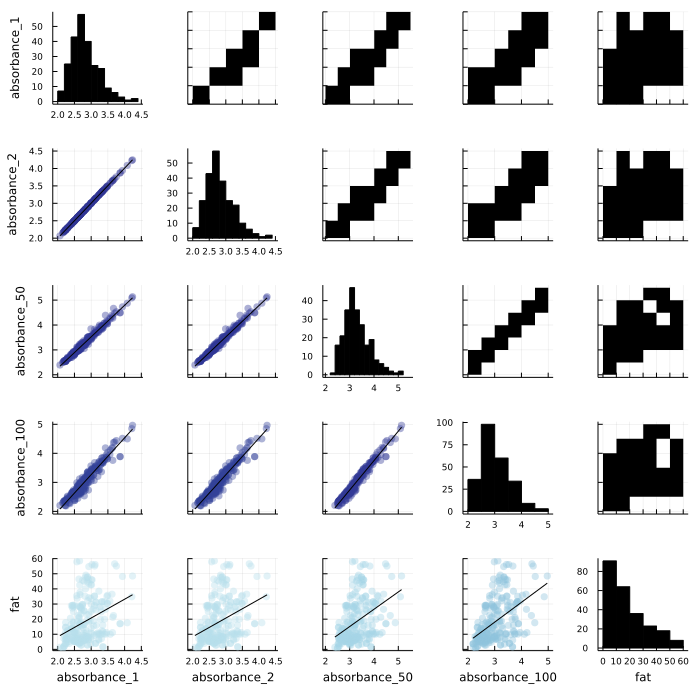

In [6]:
@df tecator corrplot([:absorbance_1 :absorbance_2 :absorbance_50 :absorbance_100 :fat], labelfontsize = 8, tickfontsize = 6, size = (700, 700))

The absorbance measurements seem to be highly correlated. As a general trend we observe also that the higher the absorbance values the higher the fat content, but there is a large spread; i.e. it does not seem to be possible to make an accurate prediction of the fat content using the measurements of a single absorbance channel.

We will use only the raw absorbance spectrum channels (columns 1 to 100) as predictors. We have therefore $n = 240$, $p = 100$: there are many predictors for not so much data and the predictors seems to be correlated. We need to be careful not to overfit the data. Let us start with some regularized linear regression.

In [7]:
begin
	model1 = RidgeRegressor()
	tuned_model1 = TunedModel(model = model1,
	                          resampling = CV(nfolds = 5),
	                          tuning = Grid(goal = 100),
	                          range = range(model1, :lambda,
									        scale = :log,
									        lower = 1e-10, upper = 1e-3),
	                          measure = rmse)
	mach1 = fit!(machine(tuned_model1,
		                 select(tecator, r"absorbance"),
		                 tecator.fat), rows = 1:172, verbosity = 0)
end

trained Machine; does not cache data
  model: DeterministicTunedModel(model = RidgeRegressor(lambda = 1.0, …), …)
  args: 
    1:	Source @068 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @559 ⏎ AbstractVector{ScientificTypesBase.Continuous}


┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: [:identity, :log10]
└ @ Plots /Users/simonlee/.julia/packages/Plots/FCUr0/src/args.jl:1677


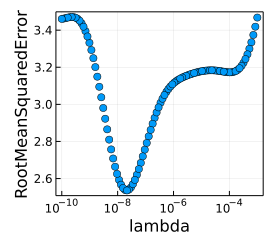

In [8]:
plot(mach1)

In [9]:
report(mach1).best_model

RidgeRegressor(
  lambda = 2.154434690031886e-8, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [10]:
report(mach1).best_history_entry.measurement

1-element Vector{Float64}:
 2.5360028472640477

In [11]:
rmse(predict(mach1, select(tecator, r"absorbance")[173:end, :]), 
     tecator.fat[173:end])

3.0515506373931083

We could also evaluate the tuned linear model with (nested) cross-validation to find a more accurate estimate of the test error:

In [12]:
lin_model_evaluation = evaluate!(machine(tuned_model1,
	                                     select(tecator, r"absorbance"),
	                                     tecator.fat),
	                             verbosity = 0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────┬───────────┬─────────────┬─────────┬──────────────────
│ measure                │ operation │ measurement │ 1.96*SE │ per_fold        ⋯
├────────────────────────┼───────────┼─────────────┼─────────┼──────────────────
│ RootMeanSquaredError() │ predict   │ 2.59        │ 0.355   │ [2.87, 2.63, 2. ⋯
└────────────────────────┴───────────┴─────────────┴─────────┴──────────────────
                                                                1 column omitted


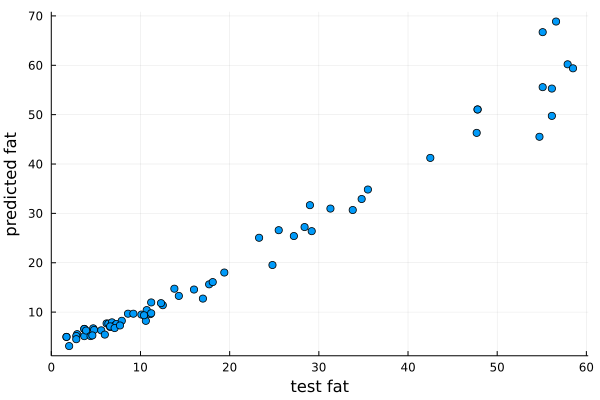

In [13]:
scatter(tecator.fat[173:end],
	    predict(mach1, select(tecator, r"absorbance")[173:end, :]),
        legend = false, xlabel = "test fat", ylabel = "predicted fat")

Predictions for meats with a high fat content seem to be rather off.

Let us now try a simple multi-layer perceptron. We will use a standardizer in our pipeline.

In [14]:
begin
	model2 = @pipeline(Standardizer(),
                       NeuralNetworkRegressor(
                             builder = MLJFlux.Short(n_hidden = 128,
                                                     σ = relu),
                             optimiser = ADAM(),
                             batch_size = 32),
                       target = Standardizer())
	tuned_model2 = TunedModel(model = model2,
							  resampling = CV(nfolds = 5),
	                          range = [range(model2,
						                :(neural_network_regressor.builder.dropout),
									    values = [0., .1, .2]),
								       range(model2,
									     :(neural_network_regressor.epochs),
									     values = [500, 1000, 2000])],
	                          measure = rmse)
	mach2 = fit!(machine(tuned_model2,
	                     select(tecator, r"absorbance"),
		                 tecator.fat), rows = 1:172, verbosity = 0)
end

┌ Info: Treating pipeline as a `Deterministic` predictor.
│ To override, specify `prediction_type=...` (options: :deterministic, :probabilistic, :interval). 
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/composition/models/deprecated.jl:387


trained Machine; does not cache data
  model: DeterministicTunedModel(model = Pipeline343(standardizer = Standardizer(features = Symbol[], …), …), …)
  args: 
    1:	Source @584 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @500 ⏎ AbstractVector{ScientificTypesBase.Continuous}


In [15]:
report(mach2).best_model.neural_network_regressor

NeuralNetworkRegressor(
  builder = Short(
        n_hidden = 128, 
        dropout = 0.2, 
        σ = NNlib.relu), 
  optimiser = Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}()), 
  loss = Flux.Losses.mse, 
  epochs = 2000, 
  batch_size = 32, 
  lambda = 0.0, 
  alpha = 0.0, 
  rng = Random._GLOBAL_RNG(), 
  optimiser_changes_trigger_retraining = false, 
  acceleration = CPU1{Nothing}(nothing))

In [16]:
report(mach2).best_history_entry.measurement

1-element Vector{Float64}:
 1.4642705285831314

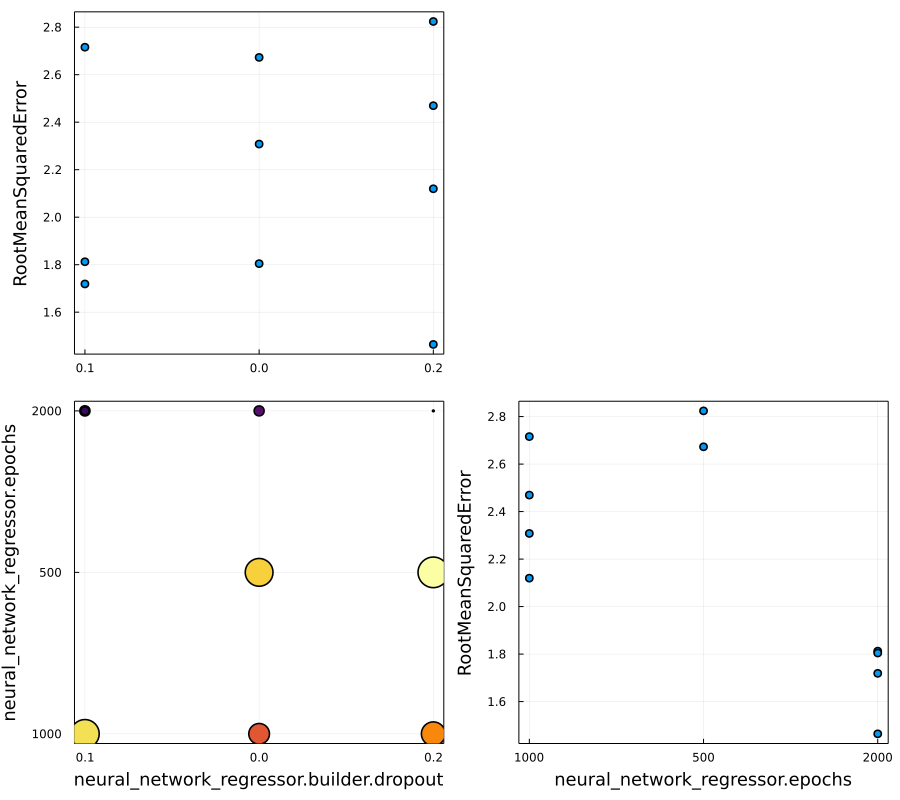

In [17]:
plot(mach2, labelfontsize = 12, size = (900, 800))

In [18]:
rmse(predict(mach2, select(tecator, r"absorbance")[173:end, :]),
     tecator.fat[173:end])

2.002314869547104

In [20]:
nn_model_evaluation = evaluate!(machine(tuned_model2,
	                            select(tecator, r"absorbance"),
		                        tecator.fat), measure = rmse, verbosity = 0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────┬───────────┬─────────────┬─────────┬──────────────────
│ measure                │ operation │ measurement │ 1.96*SE │ per_fold        ⋯
├────────────────────────┼───────────┼─────────────┼─────────┼──────────────────
│ RootMeanSquaredError() │ predict   │ 1.8         │ 0.508   │ [1.98, 1.29, 1. ⋯
└────────────────────────┴───────────┴─────────────┴─────────┴──────────────────
                                                                1 column omitted


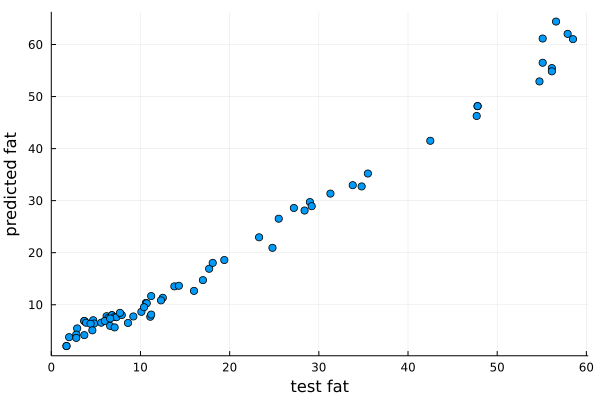

In [19]:
scatter(tecator.fat[173:end],
	    predict(mach2, select(tecator, r"absorbance")[173:end, :]),
        legend = false, xlabel = "test fat", ylabel = "predicted fat")

With this neural network we get a much better test performance than with ridge regression. The predictions for meats with high fat content are much better with the neural network.